In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical
import tensorflow.keras.datasets as datasets
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Reshape, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
MAX_WORDS = 1000

In [16]:
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_words, train_labels), (test_words, test_labels) = datasets.reuters.load_data(num_words=MAX_WORDS)
print(type(train_words), train_words.shape)
print(type(train_labels), train_labels.shape)

# restore np.load for future normal usage
np.load = np_load_old

max_val = 0
for i in range(len(train_words)):
    if max_val < max(train_words[i]):
        max_val = max(train_words[i])
print('Maximum word value: ', max_val)

<class 'numpy.ndarray'> (8982,)
<class 'numpy.ndarray'> (8982,)
Maximum word value:  999


In [17]:
word_index =  datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_words[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of ? co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? ? revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash ? per share this year should be 2 50 to three dlrs reuter 3


In [24]:
def vectorize_sequences(sequences, dimensions=MAX_WORDS):
    output = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        output[i, sequence] = 1
    return output

In [34]:
x_train = vectorize_sequences(train_words)
x_test = vectorize_sequences(test_words)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(8982, 1000) (2246, 1000)
(8982, 46) (2246, 46)


In [28]:
print(x_train[0], sum(x_train[0]))

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [73]:
model = Sequential([Dense(64, activation='relu', input_shape=(1000,)),
                    Dense(128, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(512, activation='relu'),
                    Dense(46, activation='softmax')])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                64064     
_________________________________________________________________
dense_41 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_42 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_43 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_44 (Dense)             (None, 46)                23598     
Total params: 260,590
Trainable params: 260,590
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 0s 39us/sample - loss: 2.2035 - acc: 0.4424 - val_loss: 1.6406 - val_acc: 0.5944
Epoch 2/20
8982/8982 [==============================] - 0s 12us/sample - loss: 1.4850 - acc: 0.6514 - val_loss: 1.4201 - val_acc: 0.6545
Epoch 3/20
8982/8982 [==============================] - 0s 11us/sample - loss: 1.2382 - acc: 0.6996 - val_loss: 1.3431 - val_acc: 0.6670
Epoch 4/20
8982/8982 [==============================] - 0s 11us/sample - loss: 1.0844 - acc: 0.7331 - val_loss: 1.2412 - val_acc: 0.6928
Epoch 5/20
8982/8982 [==============================] - 0s 12us/sample - loss: 0.9715 - acc: 0.7580 - val_loss: 1.1806 - val_acc: 0.7146
Epoch 6/20
8982/8982 [==============================] - 0s 11us/sample - loss: 0.8612 - acc: 0.7894 - val_loss: 1.0946 - val_acc: 0.7364
Epoch 7/20
8982/8982 [==============================] - 0s 11us/sample - loss: 0.7946 - acc: 0.8003 - val_loss: 1.1198 - val_acc: 

In [79]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_acc = history.history['acc']
test_acc = history.history['val_acc']

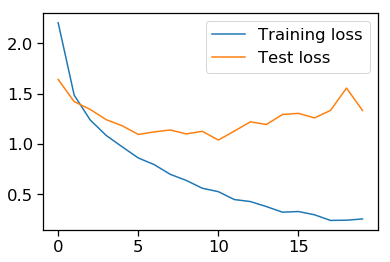

In [83]:
plt.plot(list(range(len(train_loss))), train_loss, label='Training loss')
plt.plot(list(range(len(test_loss))), test_loss, label='Test loss')
plt.legend()

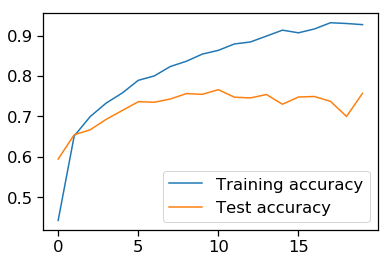

In [84]:
plt.plot(list(range(len(train_loss))), train_acc, label='Training accuracy')
plt.plot(list(range(len(test_loss))), test_acc, label='Test accuracy')
plt.legend()